In [1]:
var('x, y, a, k, l')

f(x, y) = cos(a*x + y) + l*(x-y)
A = srange(1, 2, 0.25, include_endpoint=True)
L = srange(0.5, 1.5, 0.25, include_endpoint=True)
f = f(a=A[0], l=L[0])
#f(x, y) = x*y^3 - y
f(x,y) = -y^2 + 2.5*x/(1+x^2)
I = [0, 1]
y0 = 0
y0 = -0.4122
srange(I[0], I[1], step=0.1, include_endpoint=True)[1:]

[0.100000000000000,
 0.200000000000000,
 0.300000000000000,
 0.400000000000000,
 0.500000000000000,
 0.600000000000000,
 0.700000000000000,
 0.800000000000000,
 0.900000000000000,
 1.00000000000000]

In [2]:
# е is empty, so on the border of [0,1]\times[0,1] it seems:

maximum = -Infinity

for v in ('x', 'y'):
    for p in (I[0], I[1]):
        z = find_local_maximum(f(**{v: p}), 0, 1)[0]
        z = abs(z)
        if z > maximum:
            maximum = z

M1 = maximum

# solve(diff(f, x).gradient().list(), x, y) is [[x == c558, y == 1/2*pi + pi*z555 - c558]], so

M2 = find_local_maximum(diff(f, x)(y=1/2*pi-x), I[0], I[1])[0]
M2 = abs(M2)
M3 = abs(find_local_maximum(diff(f, x)(y=1/2*pi-x), I[0], I[1])[0])
M3 = abs(M3)
M4 = M2 + M1*M3

In [3]:
# Adams

ORDER = 4
MAX_K = 10

h = 0.1
eta = h * f

def RK(f, xk, yk, h=0.1):
    k1 = h * f(xk, yk)
    k2 = h * f(xk + h/2, yk + k1/2)
    k3 = h * f(xk + h/2, yk + k2/2)
    k4 = h * f(xk + h, yk + k3)
    return (yk + 1/6 * (k1 + 2*k2 + 2*k3 + k4))

def update_DE(DE, Y):
    DE[0].append(eta(X[len(Y)-1], Y[-1]))
    for k in range(1, len(DE)):
        DE[k].append(DE[k-1][-1] - DE[k-1][-2])

X = srange(0, 1, h, include_endpoint=True)
Y = [y0]

#for k in range(11):
#    Y.append(RK(f, X[k], Y[k], h))
#html('Full table calculated with Runge-Kutta')
#
#html(table(zip(X, Y),
#            header_row=['$x_k$', '$y_k$'],
#            header_column=['']+range(len(X))))
#Y = [y0]

for k in range(4):
    Y.append(RK(f, X[k], Y[k], h))

E = [eta(x=X[k], y=Y[k]) for k in range(len(Y))]

DE = []
DE.append(E)

for _ in range(1, ORDER+1):
    DE.append([DE[-1][i+1] - DE[-1][i] for i in range(len(DE[-1])-1)])

for k in range(4, MAX_K):
    Y.append(Y[k] + \
             DE[0][k] + \
             1/2 * DE[1][k-1] + \
             5/12 * DE[2][k-2] + \
             3/8 * DE[3][k-3] + \
             251/720 * DE[4][k-4])
    update_DE(DE, Y)
    
html(table([X] + [Y] + DE,
                header_row=range(len(X)),
                header_column=['', '$x$', '$y$', '$\eta$']+['$\Delta^%s$' % i for i in range(1,ORDER+1)]))

Adams_graph = line(zip(X, Y), color='red', figsize=6, legend_label='Adams')

Y_A = Y

<div class="notruncate">
<table  class="table_form">
<tbody>
<tr>
<th class="ch"></th>
<th><script type="math/tex">0</script></th>
<th><script type="math/tex">1</script></th>
<th><script type="math/tex">2</script></th>
<th><script type="math/tex">3</script></th>
<th><script type="math/tex">4</script></th>
<th><script type="math/tex">5</script></th>
<th><script type="math/tex">6</script></th>
<th><script type="math/tex">7</script></th>
<th><script type="math/tex">8</script></th>
<th><script type="math/tex">9</script></th>
<th><script type="math/tex">10</script></th>
</tr>
<tr class ="row-a">
<td class="ch"><script type="math/tex">x</script></td>
<td><script type="math/tex">0.000000000000000</script></td>
<td><script type="math/tex">0.100000000000000</script></td>
<td><script type="math/tex">0.200000000000000</script></td>
<td><script type="math/tex">0.300000000000000</script></td>
<td><script type="math/tex">0.400000000000000</script></td>
<td><script type="math/tex">0.500000000000000</script></td>
<td><script type="math/tex">0.600000000000000</script></td>
<td><script type="math/tex">0.700000000000000</script></td>
<td><script type="math/tex">0.800000000000000</script></td>
<td><script type="math/tex">0.900000000000000</script></td>
<td><script type="math/tex">1.00000000000000</script></td>
</tr>
<tr class ="row-b">
<td class="ch"><script type="math/tex">y</script></td>
<td><script type="math/tex">-0.412200000000000</script></td>
<td><script type="math/tex">-0.417126341641257</script></td>
<td><script type="math/tex">-0.397294311687825</script></td>
<td><script type="math/tex">-0.352833701588401</script></td>
<td><script type="math/tex">-0.285368022382899</script></td>
<td><script type="math/tex">-0.197998533884158</script></td>
<td><script type="math/tex">-0.0948911511652433</script></td>
<td><script type="math/tex">0.0189302773958977</script></td>
<td><script type="math/tex">0.138073495115607</script></td>
<td><script type="math/tex">0.257325571192236</script></td>
<td><script type="math/tex">0.372079981112155</script></td>
</tr>
<tr class ="row-a">
<td class="ch"><script type="math/tex">\eta</script></td>
<td><script type="math/tex">-0.0169908840000000</script></td>
<td><script type="math/tex">0.00735303675842287</script></td>
<td><script type="math/tex">0.0322926460669728</script></td>
<td><script type="math/tex">0.0563581773518840</script></td>
<td><script type="math/tex">0.0780634057318514</script></td>
<td><script type="math/tex">0.0960796580579724</script></td>
<td><script type="math/tex">0.109393684590112</script></td>
<td><script type="math/tex">0.117413828889302</script></td>
<td><script type="math/tex">0.120044790506851</script></td>
<td><script type="math/tex">0.117687747306252</script></td>
<td><script type="math/tex">0.111155648765558</script></td>
</tr>
<tr class ="row-b">
<td class="ch"><script type="math/tex">\Delta^1</script></td>
<td><script type="math/tex">0.0243439207584229</script></td>
<td><script type="math/tex">0.0249396093085499</script></td>
<td><script type="math/tex">0.0240655312849112</script></td>
<td><script type="math/tex">0.0217052283799675</script></td>
<td><script type="math/tex">0.0180162523261209</script></td>
<td><script type="math/tex">0.0133140265321399</script></td>
<td><script type="math/tex">0.00802014429918931</script></td>
<td><script type="math/tex">0.00263096161754953</script></td>
<td><script type="math/tex">-0.00235704320059885</script></td>
<td><script type="math/tex">-0.00653209854069448</script></td>
</tr>
<tr class ="row-a">
<td class="ch"><script type="math/tex">\Delta^2</script></td>
<td><script type="math/tex">0.000595688550127021</script></td>
<td><script type="math/tex">-0.000874078023638689</script></td>
<td><script type="math/tex">-0.00236030290494374</script></td>
<td><script type="math/tex">-0.00368897605384653</script></td>
<td><script type="math/tex">-0.00470222579398098</script></td>
<td><script type="math/tex">-0.00529388223295064</script></td>
<td><script typ

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:50: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


In [4]:
# Euler

Euler_graphs = []
colors = {0.1: 'blue', 0.2: 'purple', 0.05: 'green'}
B(x0, xk, h) = M4/(2*M3)*h*exp(M3*(xk - x0))

for h in [0.1, 0.2, 0.05]:
    html('<h3>$h=%s$</h3>' % h.n(digits=2))
    X = srange(I[0], I[1], step=h, include_endpoint=True)
    Y = [y0]
    for x in X:
        Y.append(Y[-1] + h*f(x, Y[-1]))

    html(table(zip(X, Y),
                header_row=['$x_k$', '$y_k$'],
                header_column=['']+range(len(X))))
    
    Euler_graphs.append(line(zip(X, Y), color=colors[h], figsize=6, legend_label='$h=%s$' % h.n(digits=2)))
    
    html('$\| y_{10}^E - y_{10}^A \| = %s \leq %s$' % (abs(Y[-1]-Y_A[-1]), B(X[0], X[-1], h)))

<h3><script type="math/tex">h=0.10</script></h3>

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:8: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


,,
,,
,,
,,
,,
,,
,,
,,
,,
,,
,,


/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:16: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


<script type="math/tex">\| y_{10}^E - y_{10}^A \| = 0.0399201674959314 \leq 1.37053057057914</script>

/usr/lib/sagemath/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:20: DeprecationWarning:  html(...) will change soon to return HTML instead of printing it. Instead use pretty_print(html(...)) for strings or just pretty_print(...) for math. 
See http://trac.sagemath.org/18292 for details.


<h3><script type="math/tex">h=0.20</script></h3>

,,
,,
,,
,,
,,
,,
,,


<script type="math/tex">\| y_{10}^E - y_{10}^A \| = 0.0736606046517978 \leq 2.74106114115828</script>

<h3><script type="math/tex">h=0.050</script></h3>

,,
,,
,,
,,
,,
,,
,,
,,
,,
,,
,,


<script type="math/tex">\| y_{10}^E - y_{10}^A \| = 0.0207376051166063 \leq 0.685265285289570</script>

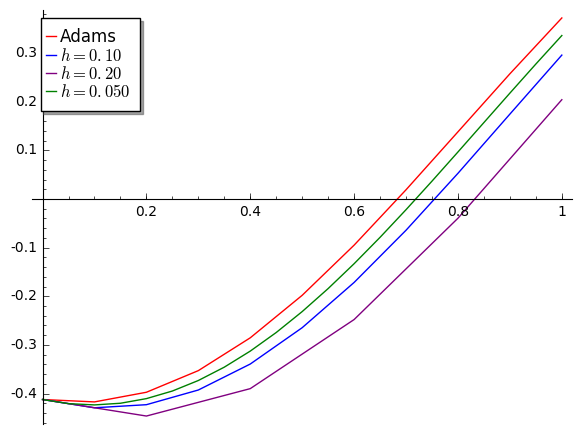

In [6]:
sum(Euler_graphs, Adams_graph).show()